##

dont use numrefields, box & swarm plot overlaying does not function there anymore! --> e.g. behav_fit

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as op
import pandas as pd
import numpy as np
from scipy import stats

phenotype_folder = '/Users/mrenke/data/ds-dnumrisk/derivatives/phenotype'
plot_folder = '/Users/mrenke/Desktop/DNumRisk/figures/plots'

confspec = '32P'

groupList = pd.read_csv(op.join(phenotype_folder, 'group_assignment.csv')).set_index('subject')
groupList['group'] = np.where(groupList['group'] == 0, 'Control', 'Dyscalculic')



NPC_dispersion - not normal distribution (reject H0)
NPC_dispersion - not normal distribution (reject H0)
NPC_dispersion - not normal distribution (reject H0)


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/U

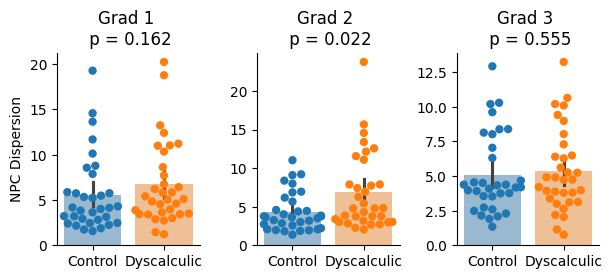

In [55]:
import pingouin as pg
from scipy.stats import normaltest, ttest_ind, mannwhitneyu
alpha = 0.05

fig, axs = plt.subplots(1,3,figsize=(7,2.5))

for i, grad_n in enumerate([1,2,3]):
    tmp = pd.read_csv(op.join(phenotype_folder, f'withinNdispersion-NPC_grad-{grad_n}_confspec-{confspec}scrub3BPfilterrunFD104.csv'))
    tmp['group'] = np.where(tmp['group'] == 0, 'Control', 'Dyscalculic')

    y_var = 'NPC_dispersion'
    sns.barplot(ax=axs[i], data=tmp, x='group', hue='group', y=y_var, alpha=0.5)#, legend =False)
    sns.swarmplot(ax=axs[i], data=tmp, x='group',  hue='group', y=y_var, size=6, legend =False)

    #an = pg.anova(data=tmp, dv=y_var, between='group') #p_val = np.round(an['p-unc'][0],3)
    tmp = tmp.set_index(['subject','group'])
    _, pval_normal = normaltest(tmp[y_var])
    if pval_normal > alpha:
            print(f'{y_var} - normal distribution (fail to reject H0)')
            stats = ttest_ind(tmp.xs('Control',0,'group')[y_var], tmp.xs('Dyscalculic',0,'group')[y_var], axis=0)
    else: # non parametric test
            print(f'{y_var} - not normal distribution (reject H0)')    
            stats = mannwhitneyu(tmp.xs('Control',0,'group')[y_var], tmp.xs('Dyscalculic',0,'group')[y_var], axis=0)
             
    axs[i].set(title=f'Grad {grad_n} \n p = {stats.pvalue:.3f}', xlabel=None)  # xlabel='Group',
    axs[i].set(ylabel='NPC Dispersion') if grad_n == 1 else axs[i].set(ylabel=None) 
    sns.despine()

fig.subplots_adjust(wspace=0.4)
plt.savefig(op.join(plot_folder, f'NPC_dispersion_grad-123_confspec-{confspec}.png'), dpi=300, bbox_inches='tight')

NPC_2D_dispersion - not normal distribution (reject H0)


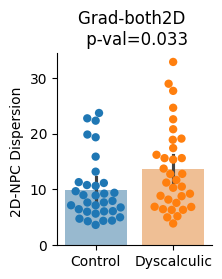

In [54]:
from scipy.stats import normaltest, ttest_ind, mannwhitneyu
alpha = 0.05
grad_n = 'both2D'
tmp = pd.read_csv(op.join(phenotype_folder, f'withinNdispersion-NPC_grad-{grad_n}_confspec-{confspec}scrub3BPfilterrunFD104.csv'))
tmp['group'] = np.where(tmp['group'] == 0, 'Control', 'Dyscalculic')

y_var = 'NPC_2D_dispersion'

tmp = tmp.set_index(['subject','group'])


figure, axes = plt.subplots(1, 1,figsize = (2,2.5))
sns.barplot(data=tmp.reset_index(), x ='group', hue='group',y=y_var, alpha=0.5,legend=False)
sns.swarmplot(data=tmp.reset_index(),  x ='group', hue='group',y=y_var, size=6,legend=False)
_, pval_normal = normaltest(tmp[y_var])

if pval_normal > alpha:
        print(f'{y_var} - normal distribution (fail to reject H0)')
        stats = ttest_ind(tmp.xs('Control',0,'group')[y_var], tmp.xs('Dyscalculic',0,'group')[y_var], axis=0)
else: # non parametric test
        print(f'{y_var} - not normal distribution (reject H0)')    
        stats = mannwhitneyu(tmp.xs('Control',0,'group')[y_var], tmp.xs('Dyscalculic',0,'group')[y_var], axis=0)
axes.set(title=f'Grad-{grad_n} \n p-val={stats.pvalue:.3f}',
    ylabel='2D-NPC Dispersion ', xlabel=None)#,ylim=[0,15])
sns.despine()
plt.savefig(op.join(plot_folder, f'NPC_dispersion_grad-{grad_n}_confspec-{confspec}.png'), dpi=300, bbox_inches='tight')

## Neural

In [69]:
df_decode = pd.read_csv(op.join(phenotype_folder, 'decoding_r.csv')).set_index('subject').join(groupList)
df_decode.head()

,r,group
subject,,
1,-0.058083,Control
2,0.206071,Dyscalculic
4,-0.089840,Dyscalculic
5,-0.023735,Control
6,0.062036,Dyscalculic


r - normal distribution (fail to reject H0)


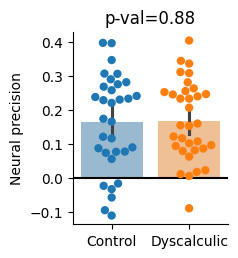

In [76]:
y_var = 'r'

tmp = df_decode.set_index('group', append=True)


figure, axes = plt.subplots(1, 1,figsize = (2,2.5))
sns.barplot(data=tmp.reset_index(), x ='group', hue='group',y=y_var, alpha=0.5,legend=False)
sns.swarmplot(data=tmp.reset_index(),  x ='group', hue='group',y=y_var, size=6,legend=False)
_, pval_normal = normaltest(tmp[y_var])

if pval_normal > alpha:
        print(f'{y_var} - normal distribution (fail to reject H0)')
        stats = ttest_ind(tmp.xs('Control',0,'group')[y_var], tmp.xs('Dyscalculic',0,'group')[y_var], axis=0)
else: # non parametric test
        print(f'{y_var} - not normal distribution (reject H0)')    
        stats = mannwhitneyu(tmp.xs('Control',0,'group')[y_var], tmp.xs('Dyscalculic',0,'group')[y_var], axis=0)
axes.set(title=f'p-val={stats.pvalue:.2f}',
    ylabel='Neural precision', xlabel=None)#,ylim=[0,15])
axes.axhline(0, color='black')#, linestyle='--')
sns.despine()